# Part II Assignment 2

## 1. Consider the cubic approximation $g(x)$ of the function $f(x)$ 
$$
f(x)\approx g(x)=Ax^3 +Bx^2 +Cx+D
$$
which satisfies

$$
\begin{cases}
\begin{aligned}
g(-\frac{3h}2) &= f(-\frac{3h}2)\\
g(-\frac{h}2) &= f(-\frac{h}2)\\
g(\frac{h}2) &= f(\frac{h}2)\\
g(\frac{3h}2) &= f(\frac{3h}2)
\end{aligned}
\end{cases}
$$

### (a) Find $B$ and $D$ in terms of $h$

In [ ]:
using SymPy,Plots,Markdown

plotly();

In [2]:
@syms h x f()
@syms A B C D

(A, B, C, D)

In [3]:
g(x) = A*x^3+B*x^2+C*x+D

g (generic function with 1 method)

In [4]:
solution = linsolve([g(x)-f(x) for x ∈ (-3*h/2,-h/2,h/2,3*h/2)],(A,B,C,D))

⎧⎛   ⎛-3⋅h ⎞    ⎛-h ⎞    ⎛h⎞    ⎛3⋅h⎞   ⎛-3⋅h ⎞    ⎛-h ⎞    ⎛h⎞    ⎛3⋅h⎞   ⎛-3
⎪⎜  f⎜─────⎟   f⎜───⎟   f⎜─⎟   f⎜───⎟  f⎜─────⎟   f⎜───⎟   f⎜─⎟   f⎜───⎟  f⎜──
⎪⎜   ⎝  2  ⎠    ⎝ 2 ⎠    ⎝2⎠    ⎝ 2 ⎠   ⎝  2  ⎠    ⎝ 2 ⎠    ⎝2⎠    ⎝ 2 ⎠   ⎝  
⎨⎜- ──────── + ────── - ──── + ──────, ──────── - ────── - ──── + ──────, ────
⎪⎜       3         3       3       3        2         2       2       2     24
⎪⎝    6⋅h       2⋅h     2⋅h     6⋅h      4⋅h       4⋅h     4⋅h     4⋅h        
⎩                                                                             

⋅h ⎞      ⎛-h ⎞      ⎛h⎞    ⎛3⋅h⎞     ⎛-3⋅h ⎞      ⎛-h ⎞      ⎛h⎞    ⎛3⋅h⎞⎞⎫
───⎟   9⋅f⎜───⎟   9⋅f⎜─⎟   f⎜───⎟    f⎜─────⎟   9⋅f⎜───⎟   9⋅f⎜─⎟   f⎜───⎟⎟⎪
2  ⎠      ⎝ 2 ⎠      ⎝2⎠    ⎝ 2 ⎠     ⎝  2  ⎠      ⎝ 2 ⎠      ⎝2⎠    ⎝ 2 ⎠⎟⎪
──── - ──────── + ────── - ──────, - ──────── + ──────── + ────── - ──────⎟⎬
⋅h       8⋅h       8⋅h      24⋅h        16         16        16       16  ⎟⎪
                                                             

In [5]:
B_solution = solution.__pyobject__.args[1].args[2] |> simplify
Eq(B,B_solution)

     ⎛-3⋅h ⎞    ⎛-h ⎞    ⎛h⎞    ⎛3⋅h⎞
    f⎜─────⎟ - f⎜───⎟ - f⎜─⎟ + f⎜───⎟
     ⎝  2  ⎠    ⎝ 2 ⎠    ⎝2⎠    ⎝ 2 ⎠
B = ─────────────────────────────────
                      2              
                   4⋅h               

In [6]:
D_solution = solution.__pyobject__.args[1].args[4] |> simplify
Eq(D,D_solution)

       ⎛-3⋅h ⎞      ⎛-h ⎞      ⎛h⎞    ⎛3⋅h⎞
      f⎜─────⎟   9⋅f⎜───⎟   9⋅f⎜─⎟   f⎜───⎟
       ⎝  2  ⎠      ⎝ 2 ⎠      ⎝2⎠    ⎝ 2 ⎠
D = - ──────── + ──────── + ────── - ──────
         16         16        16       16  

### (b) Obtain the formula of the approximation of
$$
\int_{-\frac{3h}2}^{\frac{3h}2}f(x)dx\approx\int_{-\frac{3h}2}^{\frac{3h}2}(Ax^3 +Bx^2 +Cx+D)dx
$$
in terms of $h,f(-\frac{3h}2),f(-\frac{h}2),f(\frac{h}2),f(\frac{3h}2)$.

First of all, let utilize the odevity of $g(x)$ to do basic simplification.

$$
\begin{aligned}
\int_{-\frac{3h}2}^{\frac{3h}2}(Ax^3 +Bx^2 +Cx+D)dx
&=\int_{-\frac{3h}2}^{\frac{3h}2}(Bx^2+D)dx\\
\end{aligned}
$$

In [7]:
Eq(integrate(f(x),(x,-3*h/2,3*h/2)),integrate(B*x^2+D,(x,-3*h/2,3*h/2))(B=>B_solution,D=>D_solution)|>simplify)

 3⋅h                                                       
 ───                ⎛ ⎛-3⋅h ⎞      ⎛-h ⎞      ⎛h⎞    ⎛3⋅h⎞⎞
  2             3⋅h⋅⎜f⎜─────⎟ + 3⋅f⎜───⎟ + 3⋅f⎜─⎟ + f⎜───⎟⎟
  ⌠                 ⎝ ⎝  2  ⎠      ⎝ 2 ⎠      ⎝2⎠    ⎝ 2 ⎠⎠
  ⎮   f(x) dx = ───────────────────────────────────────────
  ⌡                                  8                     
-3⋅h                                                       
─────                                                      
  2                                                        

### (c) Obtain the composite rule for

$$
\int_a^bf(x)dx
$$

in terms of $h$ and $f(x_k)$, where $x_k = a + kh$, $k = 0, 1, 2,\cdots , N$, and $h = b-a$ with $N$ being a multiple of 3.

$$
\int_a^bf(x)dx=\frac{3h}8\sum_{i=1}^{\frac{N}3}\left[f(x_{3i-3})+3f(x_{3i-2})+3f(x_{3i-1})+f(x_{3i})\right]
$$


## 2. Write a program to calculate an approximate value for the integral
$$
\int_0^2(x^4-2x+1)dx
$$

### (a) using 
- (i) Trapezoidal rule
$$
I = h\left[\frac12f(a)+\frac12f(b)+\sum_{k=1}^{N-1}f(a+kh)\right]
$$

- (ii) Simpson’s 1/3 rule

$$
I = \frac13 h\left[f(a)+f(b)+4\sum_{k=1}^{\frac{N}2}f(a+(2k-1)h)+2\sum_{k=1}^{\frac{N}2-1}f(a+2kh)\right]
$$
 

with 10 slices.

In [8]:
function trapezoidal(f,a::Real,b::Real;N::Int=10,fᵃ::Union{Real,Nothing}=nothing,fᵇ::Union{Real,Nothing}=nothing)
    h = (b-a)/N
    fᵃ isa Nothing && (fᵃ = f(a))
    fᵇ isa Nothing && (fᵇ = f(b))
    return h*((fᵃ+fᵇ)/2+sum(k->f(a+k*h),1:(N-1)))
end

function simpson(f,a::Real,b::Real;N::Int=10,fᵃ::Union{Real,Nothing}=nothing,fᵇ::Union{Real,Nothing}=nothing)
    h = (b-a)/N
    fᵃ isa Nothing && (fᵃ = f(a))
    fᵇ isa Nothing && (fᵇ = f(b))
    return 1/3*h*(fᵃ+fᵇ+4*sum(k->f(a+(2k-1)*h),1:(Int(N/2)))+2*sum(k->f(a+2k*h),1:(Int(N/2-1))))
end

simpson (generic function with 1 method)

### (b) Run each of the programs in (a) and compare your result to the exact value. What is the fractional error on the calculation?

In [9]:
F(x) = x^4+2x+1
# the exact value
Iᴿ=integrate(F(x),(x,0,2)) |> N |> float

12.4

In [10]:
Iᵀ=trapezoidal(F,0,2;N=10)
display(md"""
    **Using Trapezoidal rule**:
    
    The numerical result is $Iᵀ.
    
    The fractional error is $((Iᵀ-Iᴿ)/Iᴿ).
    """)

**Using Trapezoidal rule**:

The numerical result is 12.506560000000002.

The fractional error is 0.008593548387096916.


In [11]:
Iˢ=simpson(F,0,2;N=10)
display(md"""
    **Using Simpson rule**:
    
    The numerical result is $Iˢ.
    
    The fractional error is $((Iˢ-Iᴿ)/Iᴿ).
    """)

**Using Simpson rule**:

The numerical result is 12.400426666666666.

The fractional error is 3.440860215047654e-5.


### (c) Modify both programs in (a) to use 100 slices instead. Note the improvement in the results. How do the results using Simpson’s 1/3 rule compare with those using trapezoidal rule with the same number (i.e. 10 and 100) of slices?

In [12]:
Iᵀ=trapezoidal(F,0,2;N=100)
display(md"""
    **Using Trapezoidal rule**:
    
    The numerical result is $Iᵀ.
    
    The fractional error is $((Iᵀ-Iᴿ)/Iᴿ).
    """)

**Using Trapezoidal rule**:

The numerical result is 12.401066656000005.

The fractional error is 8.602064516163944e-5.


In [13]:
Iˢ=simpson(F,0,2;N=100)
display(md"""
    **Using Simpson rule**:
    
    The numerical result is $Iˢ.
    
    The fractional error is $((Iˢ-Iᴿ)/Iᴿ).
    """)

**Using Simpson rule**:

The numerical result is 12.400000042666667.

The fractional error is 3.4408602132426464e-9.


**Comparison on result**:
The comparison of result from two method is obvious that the `simpson` method is **more accurate** that the `trapezoidal` method.

## 3.The Planck theory of thermal radiation 

tells us that in the (angular) frequency interval ω to ω + dω, a black body of unit area radiates electromagnetically an amount of thermal energy per second equal to I(ω) dω, where

$$
I(\omega)=\frac{h}{8\pi^3c^2}\frac{\omega^3}{e^{h\omega/2\pi k_BT}-1}
$$

Here h is the Planck’s constant, c is the speed of light, and kB is Boltzmann’s constant. In other words, the total power per unit area radiated by a black body is

$$
W=\int_0^{\infty}I(\omega)d\omega=\int_0^{\infty}\frac{h}{8\pi^3c^2}\frac{\omega^3}{e^{h\omega/2\pi k_BT}-1}d\omega
$$

### (a) By performing a change of variable in the integral, show that

$$
W=\sigma T^4
$$

where $\sigma$ is given by 

$$
\sigma=\frac{2\pi k_B^4}{c^2h^3}\int_0^{\infty}\frac{x^3}{e^x-1}
$$

**Show:**

Let $x=\frac{h\omega}{2\pi k_B T}$, then $\omega=\frac{2\pi k_B T}{h} x$.

$$
\begin{aligned}
W
&=\int_0^{\infty}\frac{h}{8\pi^3c^2}\frac{\omega^3}{e^{h\omega/2\pi k_BT}-1}d\omega\\
&=\int_0^{\infty}\frac{h}{8\pi^3c^2}(\frac{2\pi k_B T}{h})^4 \frac{x^3}{e^x-1}dx\\
&=\frac{2\pi k_B^4 T^4}{c^2h^3}\int_0^{\infty}\frac{x^3}{e^x-1}dx\\
&=\sigma T^4
\end{aligned}
$$



### (b) To evaluate the improper integral, perform a change of variable

$$
z=\frac{x}{1+x}
$$

so that the integral reads

$$
I=\int_0^{\infty}\frac{x^3}{e^x-1}dx=\int_0^1f(z)dz
$$

Find $f(z)$.

**Solution:**

First, solve the equation for $x$ in term of $z$,

$$
\begin{aligned}
z&=1-\frac{1}{1+x}\\
x&=\frac{z}{1-z}\\
\end{aligned}
$$

Then substitute $x$ in the integral,

$$
I=\int_0^1\frac{(\frac{z}{1-z})^3}{e^{(\frac{z}{1-z})^3}-1}d(\frac{z}{1-z})
$$

In [14]:
@syms x z

(x, z)

In [15]:
fexpr=(x^3/(exp(x)-1))(x=>z/(1-z))*simplify(diff(z/(1-z),z))
fexpr

               3              
              z               
──────────────────────────────
                  ⎛   z      ⎞
                  ⎜ ─────    ⎟
       3        2 ⎜ 1 - z    ⎟
(1 - z) ⋅(z - 1) ⋅⎝ℯ      - 1⎠

Then 

$$
f(z)=\frac{z^3}{(1-z)^5(e^{\frac{z}{1-z}}-1)}
$$

### (c) If your result in (b) is correct, 
you will notice that 𝑓(0) and 𝑓(1) are both
of the indeterminate form 0/0. Write a code to plot 𝑓(𝑧) from 𝑧 = 0.01 to
𝑧 = 0.99. 

Guess the value of $lim_{z\to0^+} f(z)$ and $lim_{z\to1^-} f(z)$.

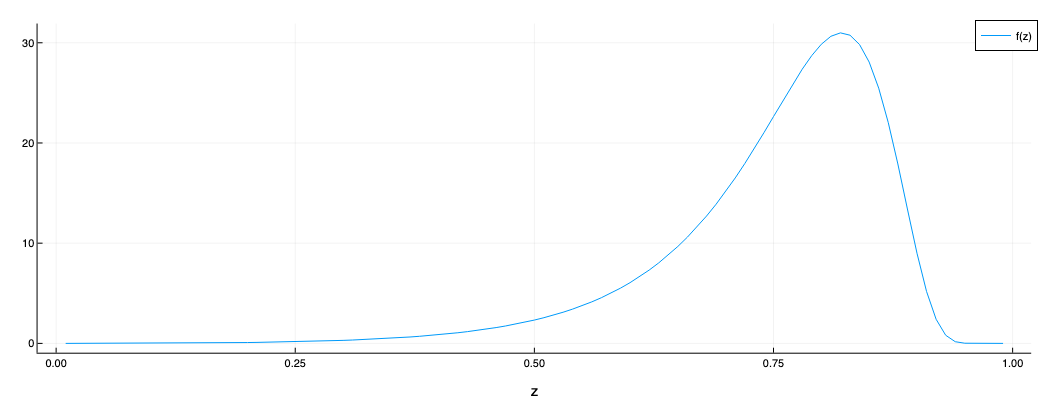

In [16]:
zs = 0.01:0.01:0.99
fs = (t->fexpr(z=>t)).(zs)

plot(zs,fs,label="f(z)")
xlabel!("z")

### (d) Verify your guess in (c) by using SymPy.

In [17]:
limit(fexpr,z=>0,"+")

0

In [18]:
limit(fexpr,z=>1,"-")

0

### (e) Write a code to evaluate the integral I accurate to five significant figures using
- (i) Trapezoidal rule
- (ii) Simpson’s rule
- (iii) Romberg integration
- (iv) Gaussian quadrature

In [19]:
import FastGaussQuadrature:gausslegendre

In [20]:
function gaussian(f,a::Real,b::Real;N::Int=10)
    x,w = gausslegendre(N)
    x = @. ((b-a)*x + (b+a))/2
    w = @. w*(b-a)/2
    return w' * f.(x)
end

function romberg(f,a::Real,b::Real;n::Int=10,fᵃ::Union{Real,Nothing}=nothing,fᵇ::Union{Real,Nothing}=nothing)
    fᵃ isa Nothing && (fᵃ = f(a))
    fᵇ isa Nothing && (fᵇ = f(b))
    h = (b-a)/2
    R = zeros(2,n+1)
    R[1,1] = h*(fᵃ+fᵇ)
    for i ∈ 1:n
        R[2,1] = R[1,1]/2 + h*sum(k->f(a+(2k-1)*h),1:(2^(i-1)))
        for j ∈ 1:i
            R[2,j+1] = (4^j*R[2,j]-R[1,j])/(4^j-1)
        end
        R[1,:] = R[2, :]
        R[2,:] .= 0
        h /= 2
    end
    return R[1,end]
end

romberg (generic function with 1 method)

In [21]:
trapezoidal(t->fexpr(z=>t)|>N,0,1;N=100,fᵃ=0,fᵇ=0)

6.4939394026378645

In [22]:
simpson(t->fexpr(z=>t)|>N,0,1;N=100,fᵃ=0,fᵇ=0)

6.49394034769517

In [23]:
romberg(t->fexpr(z=>t)|>N,0,1;n=10,fᵃ=0,fᵇ=0)

6.493939402267098

In [24]:
gaussian(t->fexpr(z=>t)|>N,0,1;N=100)

6.493939402266829

### (f) use your values for the integrals in (e) to compute the values for the Stefan–Boltzmann constant

In [25]:
σ(I;c=299792458,h=6.62607015e-34,k_B=1.380649e-23) = (2π*k_B^4)/(c^2*h^3)*I

σ (generic function with 1 method)

In [26]:
σ(6.493939402266829)

5.6703744191844314e-8

## 4. Consider the function

$$
f(x,y)=
\begin{cases}
1&x^2+y^2\leq1\\
0&otherwise
\end{cases}
$$

In my code, denote $f(x,y)$ as $S(x,y)$.

### (a) Obtain an approximate value of $\pi$ accurate to 5 sig. fig. by evaluating the following double integral by trapezoidal rule:

$$
\int_{-1}^1\int_{-1}^1f(x,y)dxdy
$$

In [27]:
S(x,y) = x^2+y^2 ≤ 1

S (generic function with 1 method)

In [28]:
function TrapezoidalIntegrate(f,as,bs;N::Int=10,dim::Int=2)
    if dim == 1
        return trapezoidal(f,as[1],bs[1];N=N)
    end
    Fys(ys...) = trapezoidal(x->f(x,ys...),as[1],bs[1];N=N)
    return TrapezoidalIntegrate(Fys,as[2:end],bs[2:end];N=N,dim=dim-1)
end

TrapezoidalIntegrate (generic function with 1 method)

In [29]:
TrapezoidalIntegrate(S,-ones(2),ones(2);N=10^5,dim=2)

3.141592409200001

### (b) Obtain an approximate value of 𝜋 by evaluating the double integral above by Monte-Carlo integration using $10^6$ points.

In [30]:
using Distributions
import Random

In [31]:
function sphere_int_by_mc(;N=10^6,dim=2)
    X = rand(Uniform(-1,1),(N,dim))
    ∑X² = sum(X .^ 2,dims=2)
    return mean(∑X² .≤ 1)*2^dim
end
    
Random.seed!(12345678)
sphere_int_by_mc(N=10^6)

3.141424

The analytic formula for the volume of a 6-dimensional hypersphere with radius R is

$$
V_6(R)=\int_{\sum_{i=1}^6 x_i^2\leq R^2}dx=\frac16\pi^3R^6
$$

### (c) Evaluate the volume of a 6-dimensional hypersphere with unit radius by
the same method in (a) with the same number of points used in (a).
Compare your answer with the analytical value of $V_6(R = 1)$. 

In [32]:
Sₙ(x...;R=1) = sum(x .^ 2) ≤ R^2
TrapezoidalIntegrate(Sₙ,-ones(6),ones(6);N=60,dim=6)

5.1745647695473265

In [33]:
π^3/6

5.167712780049969

(d) Evaluate the volume of a 6-dimensional hypersphere with unit radius by
the same method in (b) with the same number of points used in (b).
Compare your answer with the analytical value of $V_6(R=1)$.

In [34]:
Random.seed!(123456)
sphere_int_by_mc(N=10^6,dim=6)

5.175872

## 5. Consider a random walker who starts at the origin and performs one-dimensional random walk on the x-axis. In each step, he can move to the left or to the right with

$$
P(x_i)
\begin{cases}
1/2&x_i=-1\\
1/2&x_i=+1\\
\end{cases}
$$

After N steps, his position will be given by

$$
X=\sum_{i=1}^Nx_i
$$

### (a) By central limit theorem, what is the PDF of X when N is large? Write down the mean and S.D. of X in terms of N.

By central limit theorem, the PDF of X should be a normal distribution $\mathcal{N}(\mu,\sigma^2)$.

where the mean $\mu=0$ and the variance $\sigma^2=NVar(X_i)=N$, thus the standard deviation of $X$ is $\sqrt{N}$.

### (b) Set N = 5. Write a code to generate a large number (say, 10,000) of X and plot their distribution. Repeat with N = 10, 100, 500, and 1000. Verify that the distribution of X looks like that predicted by the central limit theorem in part (a).

In [35]:
function randwalk(N;samples=10^4)
    Xᵢ = rand((-1,1),(samples,N))
    X = sum(Xᵢ,dims=2)
    return vec(X)
end

randwalk (generic function with 1 method)

In [ ]:
Ns = [5;10;100;500;1000]

Xs = randwalk.(Ns)

In [37]:
using StatsPlots

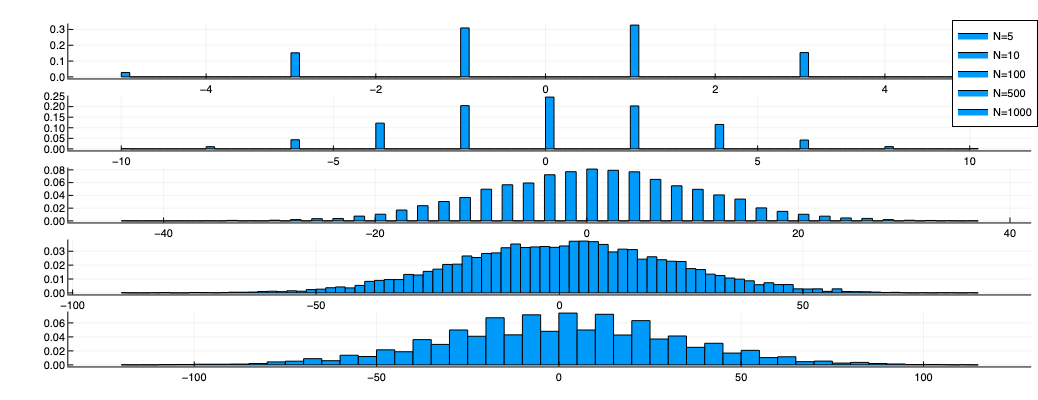

In [38]:
ps = [histogram(X,normalize=:probability,bins=:sqrt,label="N=$N") for (X,N) in zip(Xs,Ns)]
plot(ps...,layout=(5,1))

### (c) The root-mean-square $\sqrt{<X^2>}$ gives a good estimation of the “average distance” of the walker from the origin after $N$ steps. Plot $\sqrt{<X^2>}$ versus $\sqrt{N}$. What do you get? Is this what you expect from the central limit theorem?

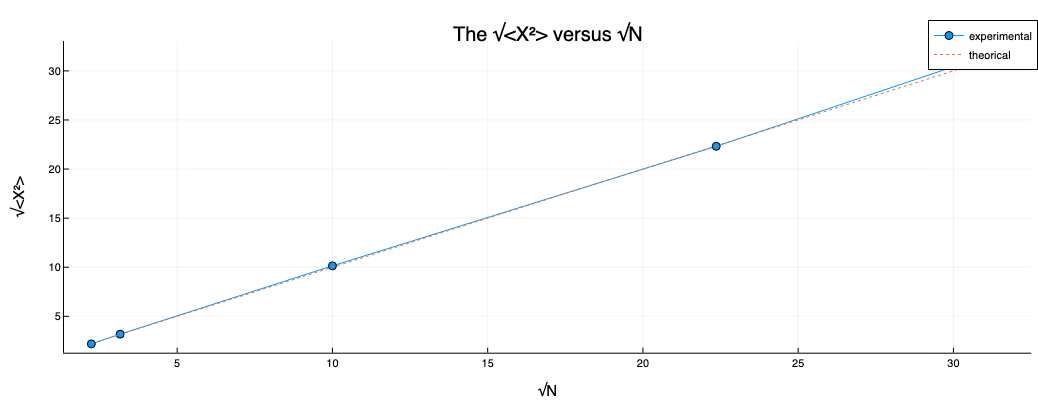

In [39]:
X²s = [X.^2 for X in Xs]

plot(.√(Ns),.√(mean.(X²s)),label="experimental",marker=:auto)
plot!(identity,.√(Ns),label="theorical",linestyle=:dot)
xlabel!("√N")
ylabel!("√<X²>")
title!("The √<X²> versus √N")

### (d) Modify your code to simulate a random walker walking on the xy plane. The walker starts at the origin. For simplicity, assume that in each step, he moves with equal probabilities in one of the four directions along the x- or y- axis.

In [40]:
function randwalk²(N;samples=10^4)
    steps = ([-1;0],[1;0],[0;-1],[0;1])
    Xᵢ = rand(steps,(samples,N))
    return sum(Xᵢ,dims=2) |> vec
end

randwalk² (generic function with 1 method)

In [ ]:
X₂s = randwalk².(Ns)

### (e) Let $(X, Y)$ and $(\rho, \theta)$ be the Cartesian and polar coordinates of the walker after $N$ steps. Plot the root-mean-square distance $\sqrt{<r^2>}$ of the walker from the origin versus $\sqrt{N}$ and describe what you observed.

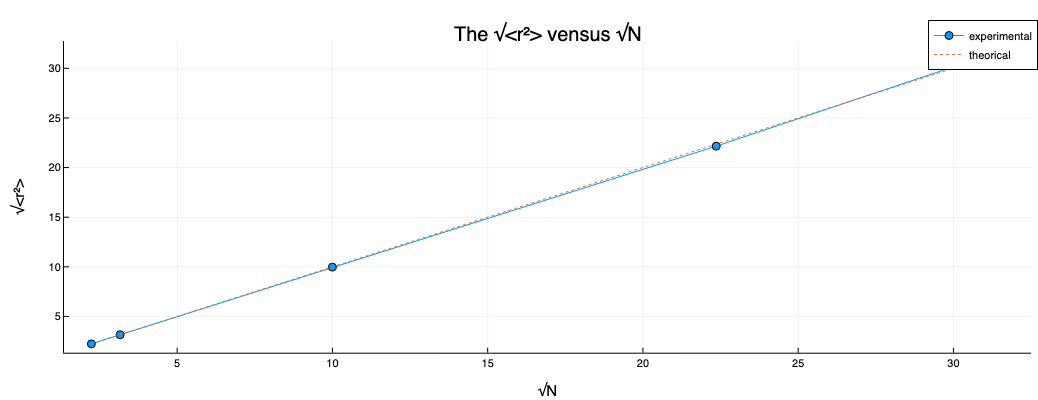

In [42]:
r²(p) = sum(p.^2)

r²s = [r².(X₂) for X₂ in X₂s]

plot(.√(Ns),.√(mean.(r²s)),label="experimental",marker=:auto)
plot!(identity,.√(Ns),label="theorical",linestyle=:dot)
xlabel!("√N")
ylabel!("√<r²>")
title!("The √<r²> vensus √N")

### (f) Define P(r) so that P(r)dr is the probability of finding the walker at a distance from r to r + dr after N steps. Set N = 10000 and plot the distribution P(r).

In [ ]:
XYs = randwalk²(10^4)

In [ ]:
rs = .√(r².(XYs))

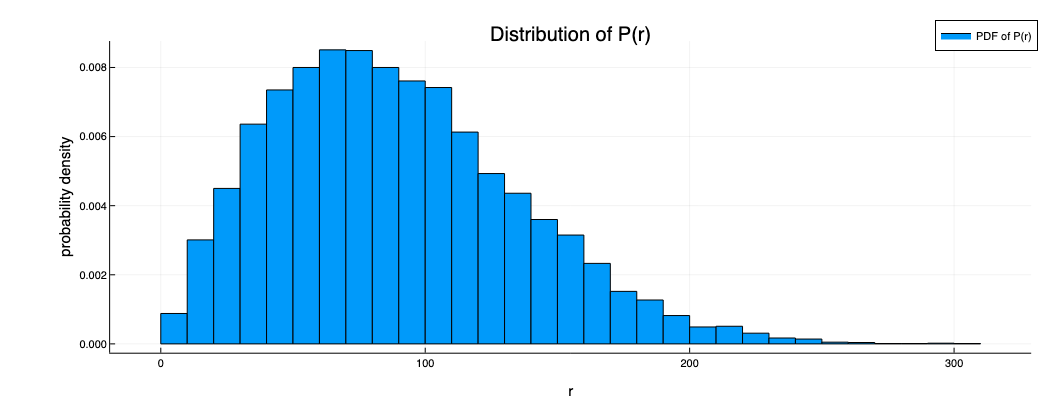

In [45]:
histogram(rs,normalize=:pdf,label="PDF of P(r)")
xlabel!("r")
ylabel!("probability density")
title!("Distribution of P(r)")

## 6. Transformation Method and Rejection Method Consider the probability distribution function (PDF)

$$
P(x)=A\cos x,\quad -\frac{\pi}2\leq x\leq \frac{\pi}2.
$$

### (a) Obtain the value of $A$.

$$
\begin{aligned}
\int_{-\frac{\pi}2}^{\frac{\pi}2}P(x)dx
&=A\int_{-\frac{\pi}2}^{\frac{\pi}2}\cos x dx\\
&=A\left[\sin{x}\right]_{-\frac{\pi}2}^{\frac{\pi}2} dx\\
1&=2A\\
A&=\frac12
\end{aligned}
$$

### (b) Sample 10,000 random deviates from the above distribution using the transformation method. Plot a histogram of the deviates.

In order to use the transformation method, we should first derive the PDF of $X$

$$
\begin{aligned}
F_X(x) &= \frac12 \int_{-\frac{\pi}2}^{x}\cos{t}dt\\
&=\frac12 (\sin{x}+1).\\
\end{aligned}
$$

Then we get the inverse function the $F_X^{-1}(x)$

$$
F_X^{-1}(u)=\sin^{-1}(2u-1)
$$

The transform formula should be

$$
\begin{aligned}
X&=F_X^{-1}(U)\\
&=\sin^{-1}(2U-1)
\end{aligned}
$$

where $U\sim \mathcal{U}(0,1)$.

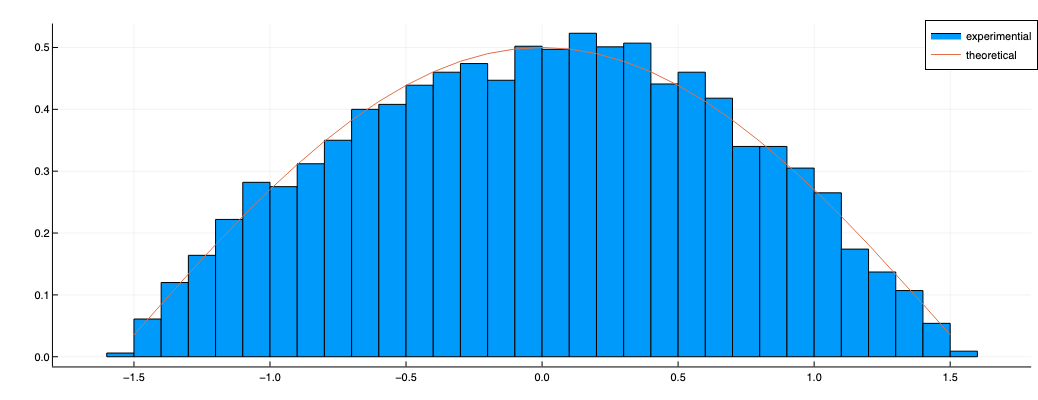

In [46]:
Us = rand(Uniform(0,1),10^4)
Xs = @. asin(2Us-1);

histogram(Xs,normalize=:pdf,label="experimential")
xs = -1.5:0.1:1.5
plot!(x->cos(x)/2,xs,label="theoretical")

Now consider the PDF

$$
P(x)=\frac35(1-\frac{x^2}2),\quad -1\leq x\leq1
$$

### (c) Assuming that the formula of the roots of cubic equation is not known, state why transformation method does not work for the above PDF.

If we can't get the roots of cubic equation, then we can't get the inverse function of PDF of $X$, thus that's the reason the transformation method does not work for the above PDF.

### (d) Sample 10,000 random deviates from the above distribution using the rejection method. You are required to choose a comparison function f(x) based on the fact that

$$
\cos x\geq 1-\frac{x^2}2 \mbox{ for } -\frac{\pi}2\leq x\leq \frac{\pi}2.
$$

Plot a histogram of the deviates. Print out the fraction of random deviates accepted in the rejection process. What is the ratio of the area under P(x) to that under your comparison function $g(x)$? Is this the same as (or close to) the fraction of deviates accepted?

In this question, we choose the comparison function $g(x)=\cos x$.

In [47]:
function reject_method(f,g,ag;M=1,N=10^4)
    Ys = zeros(N)
    n = 1
    while n ≤ N
        y = ag(rand(Uniform(0,1)))
        u = rand(Uniform(0,1))
        if u < f(y)/g(y)/M
            Ys[n] = y
            n += 1
        end
    end
    return Ys
end

reject_method (generic function with 1 method)

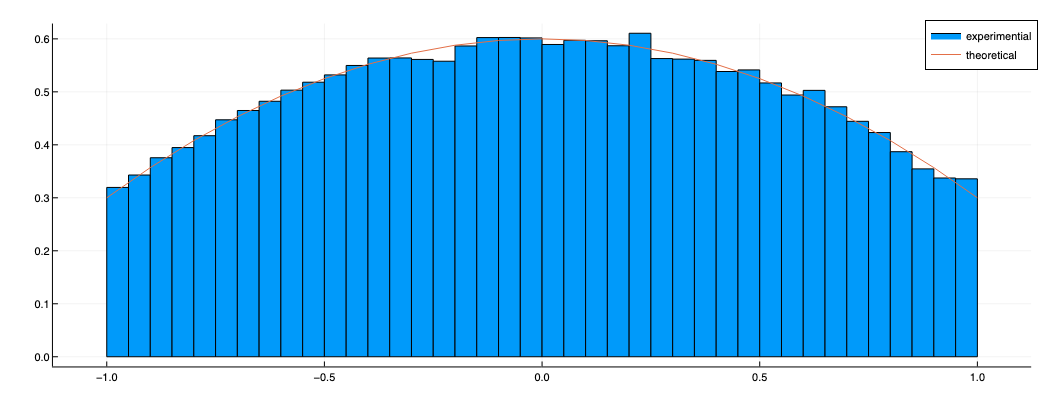

In [48]:
P(x) = -1 ≤ x ≤ 1 ? 3*(1-x^2/2)/5 : 0
Ys = reject_method(P,cos,u->asin(2u-1),N=10^5)

histogram(Ys,normalize=:pdf,label="experimential")
xs = -1:0.1:1
plot!(P,xs,label="theoretical")

## Reference

[1] Sympy.jl, https://docs.juliahub.com/SymPy/KzewI/1.1.8/

[2] Romberg's method - Wikipedia, https://en.wikipedia.org/wiki/Romberg%27s_method

[3] Github: FastGaussQuadrature.jl, https://github.com/JuliaApproximation/FastGaussQuadrature.jl

[4] Rejection sampling - Wikipedia, https://en.wikipedia.org/wiki/Rejection_sampling